# <b>Feature Extraction</b>

## 🎓 **Objective**

Learn and practice how to **extract meaningful features** from customer data to support classification models (e.g., predicting churn, segmentation).

Your goal is to **generate approximately 50 new features** from the provided customer dataset using a mix of domain knowledge, time-based logic, and behavioral analysis.

## ⚖️ **Feature Categories & Examples**

Use the categories below to brainstorm and implement features.

### ⌚ **Temporal Features (Behavior over Time)**

days_since_last_cleaning

days_since_registration

cleaning_frequency = total_cleaning / lifetime_days

first_cleaning_month

is_new_professional (1 if <30 total_bookings)

is_weekend_professional

### 🚀 **Behavioral Features (Transaction-Based)**

avg_income_per_booking

avg_work_hour_per_week

max_weekly_income

min_spend_weekly_income

std_weekly_income

cleaning_ratio_last_30d_vs_total

booking_growth_rate

### 👩‍🎓 **Demographic Features**

is_young_adult (18 ≤ age < 30)

is_senior (age ≥ 60)

home_region (derived from province)

urban (1 if urban service district)

### 💼 **Category Behavior**

most_cleaning_place_type

num_unique_cleaning_place_type

recent_place_type_change (1 if last != most most_cleaning_place_type)

most_cleaning_place_type_repeat_ratio

top_3_place_type (one-hot encoded)

### 📱 **Platform / Engagement**

platform (iOS/Android)

avg_point_trans_per_day

responded_to_communication

### ✨ **Advanced / Trend Features**

monthly_cleaning_trend (linear slope)

booking_count_last_3_months

last_30_vs_prev_30_cleaning_ratio

decline_booking_percent

### ⚠️ **Labels (if needed for supervised learning)**

is_churned (1 if no cleaning in last 90 days)

is_high_value (total_booking in top 20%)

is_frequent_cleaner (cleaning_frequency in top 10%)

## **Import Library Data**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
data_path = 'C:/Users/Christopher French/Downloads/ビニート/26_provider_segmentation/booking_raw.csv'

booking_raw = pd.read_csv(data_path)

booking_raw

C:\Users\Christopher French\AppData\Local\Temp\ipykernel_13416\1005332480.py:3: DtypeWarning: Columns (0,21) have mixed types. Specify dtype option on import or set low_memory=False.
  booking_raw = pd.read_csv(data_path)


,booking_id,user_id,is_new_customer,user_place_id,place_size,service_name,sub_service_name,extra_service,province,district,...,promo_code,discount_pct,booking_status,cancel_reason,professional_id,selected_professional_id,is_new_professional,rating,problem,is_claimed_booking
0,23,31251,1,0,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,...,NaN,NaN,เสร็จสิ้น,NaN,8,0,1,4.0,NaN,0
1,24,3,1,0,คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,...,NaN,NaN,เสร็จสิ้น,NaN,5,0,1,NaN,NaN,0
2,25,3,0,0,คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,...,NaN,NaN,เสร็จสิ้น,NaN,7,0,0,5.0,NaN,0
3,26,3,0,0,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,...,NaN,NaN,เสร็จสิ้น,NaN,7,0,0,5.0,NaN,0
4,27,3,0,0,คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,...,NaN,NaN,เสร็จสิ้น,NaN,8,0,0,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135055,250401ZPCC,206782,0,296240,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,กรุงเทพ และปริมณฑล,เขตพระโขนง,...,PACK_5,5.0,รอเข้าให้บริการ,NaN,11886,0,0,NaN,NaN,0
1135056,250508042C,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,...,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0
1135057,250508ZGX6,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,...,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0
1135058,2505085NC4,173130,0,104775,บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.),บริการทำความสะอาด,NaN,NaN,กรุงเทพ และปริมณฑล,เขตบางแค,...,NaN,NaN,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,12414,0,NaN,NaN,0


**Checking Data Quality**

In [3]:
# Convert date columns to datetime
booking_raw['booking_date'] = pd.to_datetime(booking_raw['booking_date'], errors='coerce')
booking_raw['cleaning_date'] = pd.to_datetime(booking_raw['cleaning_date'], errors='coerce')

# Convert categorical columns to category dtype
categorical_cols = [
    'place_size', 'service_name', 'sub_service_name', 'extra_service',
    'province', 'district', 'booking_status', 'cancel_reason', 'promo_code',
    'problem', 'most_cleaning_place_type'
]
for col in categorical_cols:
    if col in booking_raw.columns:
        booking_raw[col] = booking_raw[col].astype('category')

# Ensure numeric columns are correct type
numeric_cols = [
    'user_id', 'is_new_customer', 'user_place_id', 'is_sameday', 'work_hour',
    'additional_hour', 'total_price', 'discount_cost', 'credit_discount_cost',
    'discount_pct', 'professional_id', 'selected_professional_id',
    'is_new_professional', 'rating', 'is_claimed_booking'
]
for col in numeric_cols:
    if col in booking_raw.columns:
        booking_raw[col] = pd.to_numeric(booking_raw[col], errors='coerce')

In [4]:
booking_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135060 entries, 0 to 1135059
Data columns (total 28 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   booking_id                1135060 non-null  object        
 1   user_id                   1135060 non-null  int64         
 2   is_new_customer           1135060 non-null  int64         
 3   user_place_id             1135060 non-null  int64         
 4   place_size                1109181 non-null  category      
 5   service_name              1135060 non-null  category      
 6   sub_service_name          26417 non-null    category      
 7   extra_service             38345 non-null    category      
 8   province                  1135060 non-null  category      
 9   district                  1055083 non-null  category      
 10  booking_date              1135060 non-null  datetime64[ns]
 11  cleaning_date             1122731 non-null  dateti

In [5]:
booking_raw.isnull().sum()

booking_id                        0
user_id                           0
is_new_customer                   0
user_place_id                     0
place_size                    25879
service_name                      0
sub_service_name            1108643
extra_service               1096715
province                          0
district                      79977
booking_date                      0
cleaning_date                 12329
is_sameday                        0
work_hour                         0
additional_hour                   0
total_price                       0
discount_cost                     0
credit_discount_cost              0
promo_code                   507794
discount_pct                 507794
booking_status                    0
cancel_reason               1105449
professional_id                   0
selected_professional_id          0
is_new_professional               0
rating                       849957
problem                     1117932
is_claimed_booking          

In [6]:
booking_raw.columns

Index(['booking_id', 'user_id', 'is_new_customer', 'user_place_id',
       'place_size', 'service_name', 'sub_service_name', 'extra_service',
       'province', 'district', 'booking_date', 'cleaning_date', 'is_sameday',
       'work_hour', 'additional_hour', 'total_price', 'discount_cost',
       'credit_discount_cost', 'promo_code', 'discount_pct', 'booking_status',
       'cancel_reason', 'professional_id', 'selected_professional_id',
       'is_new_professional', 'rating', 'problem', 'is_claimed_booking'],
      dtype='object')

### **Feature Extraction Example**

#### **Example : total_bookings**

In [7]:
booking_raw.booking_status.unique()

['เสร็จสิ้น', 'ยกเลิก', 'รอเข้าให้บริการ', 'ยังไม่ระบุวันเข้าให้บริการ', 'ยังไม่มีคุณแม่บ้านกดรับงาน']
Categories (5, object): ['ยกเลิก', 'ยังไม่มีคุณแม่บ้านกดรับงาน', 'ยังไม่ระบุวันเข้าให้บริการ', 'รอเข้าให้บริการ', 'เสร็จสิ้น']

In [8]:
print(f"Total Service Provider: {booking_raw.professional_id.nunique()}")
print(f"Total Success Booking: {booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"].professional_id.nunique()}")
print(f"Total Unsuccess Booking: {booking_raw[booking_raw["booking_status"] == "ยกเลิก"].professional_id.nunique()}")

Total Service Provider: 7289
Total Success Booking: 7261
Total Unsuccess Booking: 2271


In [9]:
booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"].professional_id.nunique()

7261

In [10]:
total_bookings_feature = booking_raw[booking_raw['booking_status'] == 'เสร็จสิ้น']

total_bookings_feature = total_bookings_feature.groupby('professional_id')['booking_id'].nunique().reset_index(name='total_bookings')

total_bookings_feature

,professional_id,total_bookings
0,0,72
1,5,34
2,6,5
3,7,418
4,8,2
...,...,...
7256,12691,4
7257,12698,3
7258,12699,2
7259,12703,1


#### **Example : is_new_professional**

(1 if <30 total_bookings)

In [11]:
is_new_professional_feature = total_bookings_feature.copy()

is_new_professional_feature['is_new_professional'] = np.where(is_new_professional_feature['total_bookings'] >= 30, 1, 0)

is_new_professional_feature

,professional_id,total_bookings,is_new_professional
0,0,72,1
1,5,34,1
2,6,5,0
3,7,418,1
4,8,2,0
...,...,...,...
7256,12691,4,0
7257,12698,3,0
7258,12699,2,0
7259,12703,1,0


#### **Example : most_cleaning_place_type**

In [12]:
booking_raw['place_size'].unique()

['คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.)', 'คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.)', 'สำนักงาน', 'คอนโด 2 ห้องนอน (ไม่เกิน 80 ตร.ม.)', 'บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.) ', 'คอนโด 3 ห้องนอน (ไม่เกิน 100 ตร.ม.)', 'บ้าน 2-3 ชั้น (100-200 ตร.ม.)', NaN, 'บ้าน (มากกว่า 200 ตร.ม.)']
Categories (8, object): ['คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.)', 'คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.)', 'คอนโด 2 ห้องนอน (ไม่เกิน 80 ตร.ม.)', 'คอนโด 3 ห้องนอน (ไม่เกิน 100 ตร.ม.)', 'บ้าน (มากกว่า 200 ตร.ม.)', 'บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.) ', 'บ้าน 2-3 ชั้น (100-200 ตร.ม.)', 'สำนักงาน']

In [13]:
most_cleaning_place_type_feature = booking_raw.copy()
# most_cleaning_place_type_feature['place_size'].unique() # 'สำนักงาน','คอนโด 2 ห้องนอน (ไม่เกิน 80 ตร.ม.)','บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.) ', ... => 'คอนโด', 'บ้าน', 'สำนักงาน', None
most_cleaning_place_type_feature['place_type'] = np.where(most_cleaning_place_type_feature['place_size'].str.contains('คอนโด'), 'คอนโด',
                                                          np.where(most_cleaning_place_type_feature['place_size'].str.contains('บ้าน'), 'บ้าน',
                                                                   np.where(most_cleaning_place_type_feature['place_size'].str.contains('สำนักงาน'), 'สำนักงาน', None)))

most_cleaning_place_type_feature = most_cleaning_place_type_feature.groupby(['professional_id', 'place_type'])['booking_id'].nunique().reset_index(name='count')
most_cleaning_place_type_feature = most_cleaning_place_type_feature.sort_values(['professional_id', 'count'], ascending=[True, False])
most_cleaning_place_type_feature = most_cleaning_place_type_feature.drop_duplicates(subset=['professional_id'], keep='first')  
most_cleaning_place_type_feature = most_cleaning_place_type_feature[['professional_id', 'place_type']]
most_cleaning_place_type_feature.columns = ['professional_id', 'most_cleaning_place_type']

most_cleaning_place_type_feature

,professional_id,most_cleaning_place_type
0,0,คอนโด
3,4,คอนโด
5,5,บ้าน
7,6,คอนโด
10,7,สำนักงาน
...,...,...
17073,12703,บ้าน
17074,12704,คอนโด
17075,12706,สำนักงาน
17076,12710,สำนักงาน


## **フレンチ Feature Extraction**

In [14]:
booking_raw.tail()
#total_bookings_feature
#is_new_professional_feature
#most_cleaning_place_type_feature

,booking_id,user_id,is_new_customer,user_place_id,place_size,service_name,sub_service_name,extra_service,province,district,...,promo_code,discount_pct,booking_status,cancel_reason,professional_id,selected_professional_id,is_new_professional,rating,problem,is_claimed_booking
1135055,250401ZPCC,206782,0,296240,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,กรุงเทพ และปริมณฑล,เขตพระโขนง,...,PACK_5,5.0,รอเข้าให้บริการ,NaN,11886,0,0,NaN,NaN,0
1135056,250508042C,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,...,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0
1135057,250508ZGX6,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,...,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0
1135058,2505085NC4,173130,0,104775,บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.),บริการทำความสะอาด,NaN,NaN,กรุงเทพ และปริมณฑล,เขตบางแค,...,NaN,NaN,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,12414,0,NaN,NaN,0
1135059,250508RUWQ,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,...,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0


#### <b>Data Quality Issue</b>

There are no future dates in booking_date column

In [15]:
future_dates = booking_raw[booking_raw["booking_date"] > pd.Timestamp.today()]

future_dates[["professional_id", "booking_date"]]

,professional_id,booking_date


In [16]:
booking_raw.booking_date.min()

Timestamp('2016-03-23 08:50:10')

In [17]:
booking_raw.booking_date.max()

Timestamp('2025-05-08 15:10:48')

Dealing with future dates in `cleaning_date` column

In [18]:
future_dates = booking_raw[booking_raw["cleaning_date"] > pd.Timestamp.today()]

future_dates[["professional_id", "cleaning_date", "booking_status"]]

,professional_id,cleaning_date,booking_status
502266,737,2025-09-13 14:00:00,รอเข้าให้บริการ
502268,737,2025-08-02 14:00:00,รอเข้าให้บริการ
502615,737,2025-12-06 14:00:00,รอเข้าให้บริการ
532526,737,2025-09-06 14:00:00,รอเข้าให้บริการ
617066,737,2025-11-01 14:00:00,รอเข้าให้บริการ
...,...,...,...
1134243,3613,2025-07-30 09:00:00,รอเข้าให้บริการ
1134435,732,2025-10-17 13:00:00,รอเข้าให้บริการ
1134939,9475,2025-07-27 13:00:00,รอเข้าให้บริการ
1134940,9475,2025-08-10 13:00:00,รอเข้าให้บริการ


<b>Remove rows with future dates</b>

In [19]:
print(f"Data with future dates: {booking_raw.shape[0]} rows")

Data with future dates: 1135060 rows


In [20]:
booking_raw = booking_raw[booking_raw["cleaning_date"] <= pd.Timestamp.today()]

In [21]:
print(f"{1135060 - 1121217} rows removed")
print(f"Data without future dates: {booking_raw.shape[0]} rows")

13843 rows removed
Data without future dates: 1121344 rows


In [22]:
booking_raw["cleaning_date"].min()

Timestamp('1970-01-01 10:00:00')

In [23]:
booking_raw["cleaning_date"].max()

Timestamp('2025-07-24 09:00:00')

Remove rows where `cleaning_date` < `booking_date.min()`

In [24]:
booking_raw.booking_date.min()

Timestamp('2016-03-23 08:50:10')

In [25]:
booking_raw = booking_raw[booking_raw["cleaning_date"] >= booking_raw["booking_date"].min()]

In [26]:
booking_raw["cleaning_date"].min()

Timestamp('2016-03-26 13:00:00')

In [27]:
booking_raw["cleaning_date"].max()

Timestamp('2025-07-24 09:00:00')

In [28]:
print([col for col in booking_raw.columns])

['booking_id', 'user_id', 'is_new_customer', 'user_place_id', 'place_size', 'service_name', 'sub_service_name', 'extra_service', 'province', 'district', 'booking_date', 'cleaning_date', 'is_sameday', 'work_hour', 'additional_hour', 'total_price', 'discount_cost', 'credit_discount_cost', 'promo_code', 'discount_pct', 'booking_status', 'cancel_reason', 'professional_id', 'selected_professional_id', 'is_new_professional', 'rating', 'problem', 'is_claimed_booking']


#### ⌚ **Temporal Features (Behavior Over Time)**

##### <b>1. days_since_last_cleaning</b>

In [29]:
booking_raw[["professional_id", "cleaning_date"]].head()

,professional_id,cleaning_date
0,8,2016-03-26 13:00:00
1,5,2016-03-28 13:00:00
2,7,2016-03-31 17:00:00
3,7,2016-03-31 13:00:00
4,8,2016-04-01 13:00:00


In [30]:
# cleaning_date must be datetime
booking_raw[["professional_id", "cleaning_date"]].dtypes

professional_id             int64
cleaning_date      datetime64[ns]
dtype: object

In [31]:
# Find the last cleaning date for each professional
last_cleaning = booking_raw.groupby("professional_id")["cleaning_date"].max().reset_index()

# Calculate days since last cleaning (using today as reference)
#today = pd.Timestamp.today()
today = booking_raw["cleaning_date"].max()
last_cleaning["days_since_last_cleaning"] = (today - last_cleaning["cleaning_date"]).dt.days

# Result: professional_id and days_since_last_cleaning
last_cleaning[["professional_id", "days_since_last_cleaning"]].head()

,professional_id,days_since_last_cleaning
0,0,2
1,4,1041
2,5,105
3,6,767
4,7,3097


##### <b>2. days_since_registration</b>

For now, the first booking date of each professional will be count as first registration

In [32]:
first_booking = booking_raw.groupby("professional_id")["booking_date"].min().reset_index()

#today = pd.Timestamp.today()
today = booking_raw["cleaning_date"].max()
first_booking["days_since_registration"] = (today - first_booking["booking_date"]).dt.days

first_booking[["professional_id", "days_since_registration"]].head()

,professional_id,days_since_registration
0,0,3399
1,4,1044
2,5,3408
3,6,3392
4,7,3406


##### <b>3. cleaning_frequency</b>
cleaning_frequency = total_cleaning / lifetime_days

In [33]:
# STEP 1: Calculate total_cleaning for each professional (only successful bookings)
total_cleaning = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby("professional_id")["booking_id"].count().reset_index(name="total_cleaning")
    
# STEP 2: Calculate lifetime_days for each professional (days between first and last booking)
lifetime = booking_raw.groupby("professional_id")["booking_date"].agg(["min", "max"]).reset_index()
lifetime["lifetime_days"] = (lifetime["max"] - lifetime["min"]).dt.days + 1 # +1 to include both endpoints

# STEP 3: Merge total_cleaning and lifetime_days
cleaning_freq = pd.merge(total_cleaning,
                         lifetime[["professional_id", "lifetime_days"]],
                         on="professional_id", how="left" )

# STEP 4: Calculate cleaning_frequency
cleaning_freq["cleaning_frequency"] = cleaning_freq["total_cleaning"] / cleaning_freq["lifetime_days"]
cleaning_freq.head()

,professional_id,total_cleaning,lifetime_days,cleaning_frequency
0,0,72,3324,0.021661
1,5,34,3301,0.010300
2,6,5,2614,0.001913
3,7,418,286,1.461538
4,8,2,4,0.500000


##### <b>4. first_cleaning_month</b>

In [34]:
first_cleaning = booking_raw.groupby("professional_id")["cleaning_date"].min().reset_index()
first_cleaning["first_cleaning_month"] = first_cleaning["cleaning_date"].dt.month

first_cleaning[["professional_id", "first_cleaning_month"]].head()

,professional_id,first_cleaning_month
0,0,4
1,4,9
2,5,3
3,6,4
4,7,3


##### <b>5. is_new_professional</b>
(1 if less than 30 total_bookings)

In [35]:
total_bookings_feature = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby("professional_id")["booking_id"].nunique().reset_index(name="total_bookings")

total_bookings_feature["is_new_professional"] = np.where(total_bookings_feature["total_bookings"] < 30, 1, 0)

total_bookings_feature.head()

,professional_id,total_bookings,is_new_professional
0,0,72,0
1,5,34,0
2,6,5,1
3,7,418,0
4,8,2,1


##### <b>6. is_weekend_professional</b>

In [36]:
# Add a weekend indicator column (Saturday=5, Sunday=6)
booking_raw["is_weekend"] = booking_raw["cleaning_date"].dt.weekday.isin([5, 6]).astype(int)

# Calculate the ratio of weekend bookings for each professional
weekend_ratio = booking_raw.groupby("professional_id")["is_weekend"].mean().reset_index(name="weekend_ratio")

# Define is_weekend_professional:
# 1 if weekend_ratio >= 0.5 (majority bookings on weekend), else 0
weekend_ratio["is_weekend_professional"] = np.where(weekend_ratio["weekend_ratio"] >= 0.5, 1, 0)

weekend_ratio.head()

,professional_id,weekend_ratio,is_weekend_professional
0,0,0.388755,0
1,4,0.000000,0
2,5,0.410319,0
3,6,0.555556,1
4,7,0.228438,0


#### ⭐ <b>Behavioral Features (Transaction-Based)</b>

##### <b>7. avg_income_per_booking</b>

In [37]:
income_feature = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby("professional_id")["total_price"].mean().reset_index(name="avg_income_per_booking")

income_feature.head()

,professional_id,avg_income_per_booking
0,0,727.916667
1,5,735.104412
2,6,276.888000
3,7,367.222943
4,8,450.000000


##### <b>8. avg_work_hour_per_week</b>

In [38]:
booking_raw.columns

Index(['booking_id', 'user_id', 'is_new_customer', 'user_place_id',
       'place_size', 'service_name', 'sub_service_name', 'extra_service',
       'province', 'district', 'booking_date', 'cleaning_date', 'is_sameday',
       'work_hour', 'additional_hour', 'total_price', 'discount_cost',
       'credit_discount_cost', 'promo_code', 'discount_pct', 'booking_status',
       'cancel_reason', 'professional_id', 'selected_professional_id',
       'is_new_professional', 'rating', 'problem', 'is_claimed_booking',
       'is_weekend'],
      dtype='object')

In [39]:
booking_raw["week"] = booking_raw["cleaning_date"].dt.isocalendar().week

# Group by professional and week, sum work_hour
weekly_hours = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby(["professional_id", "week"])["work_hour"].sum().reset_index()

avg_work_hour_per_week = weekly_hours.groupby("professional_id")["work_hour"] \
    .mean().reset_index(name="avg_work_hour_per_week")
    
avg_work_hour_per_week.head()

,professional_id,avg_work_hour_per_week
0,0,8.840000
1,5,7.035714
2,6,3.333333
3,7,19.825581
4,8,2.250000


##### <b>9. max_weekly_income</b>

In [40]:
booking_raw["week"] = booking_raw["cleaning_date"].dt.isocalendar().week

# Group by professional and week, 
# then sum total_price for each week
weekly_income = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby(["professional_id", "week"])["total_price"].sum().reset_index()
    
# Find maximum weekly income for each provider
max_weekly_income = weekly_income.groupby("professional_id")["total_price"].max().reset_index(name="max_weekly_income")

max_weekly_income.head()

,professional_id,max_weekly_income
0,0,17750.00
1,5,7400.00
2,6,663.33
3,7,7678.88
4,8,500.00


##### <b>10. min_spend_weekly_income</b>

In [41]:
weekly_income = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby(["professional_id", "week"])["total_price"].sum().reset_index()
    
# Find minimum weekly income for each professional
min_spend_weekly_income = weekly_income.groupby("professional_id")["total_price"].min().reset_index(name="min_spend_weekly_income")

min_spend_weekly_income.head()

,professional_id,min_spend_weekly_income
0,0,570.00
1,5,500.00
2,6,221.11
3,7,570.00
4,8,400.00


##### <b>11. std_weekly_income</b>

In [42]:
std_weekly_income = weekly_income.groupby("professional_id")["total_price"].std().reset_index(name="std_weekly_income")
std_weekly_income.head()

,professional_id,std_weekly_income
0,0,3447.511639
1,5,1731.672599
2,6,223.612332
3,7,1581.978274
4,8,70.710678


##### <b>12. cleaning_ratio_last_30d_vs_total</b>

In [43]:
# Find cleaning ratio in last 30 days vs total for each professional
#today = pd.Timestamp.today()
today = booking_raw["cleaning_date"].max()

last_30d = booking_raw[
    (booking_raw["booking_status"] == "เสร็จสิ้น") &
    (booking_raw["cleaning_date"] >= (today - pd.Timedelta(days=30)))
]

# Total successful bookings in last 30 days
last_30d_count = last_30d.groupby("professional_id")["booking_id"].count().reset_index(name="cleaning_last_30d")

# Count total successful bookings
total_count = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby("professional_id")["booking_id"].count().reset_index(name="total_cleaning")
    
# Merge and calculate ratio
cleaning_ratio = pd.merge(last_30d_count, total_count, on="professional_id", how="outer").fillna(0)
cleaning_ratio["cleaning_ratio_last_30d_vs_total"] = cleaning_ratio["cleaning_last_30d"] / cleaning_ratio["total_cleaning"]

cleaning_ratio[["professional_id", "cleaning_ratio_last_30d_vs_total"]].head()

,professional_id,cleaning_ratio_last_30d_vs_total
0,0,0.0
1,5,0.0
2,6,0.0
3,7,0.0
4,8,0.0


##### <b>13. booking_growth_rate</b>

In [44]:
# Calculate booking growth rate for each professional

# Total bookings per month for each professional
monthly_bookings = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"].copy()
monthly_bookings["year_month"] = monthly_bookings["cleaning_date"].dt.to_period("M")
monthly_counts = monthly_bookings.groupby(["professional_id", "year_month"])["booking_id"].count().reset_index()

# Pivot to wide format for regression
def calc_growth_rate(df):
    if df.shape[0] < 2:
        return 0
    x = np.arange(df.shape[0])
    y = df["booking_id"].values
    slope = np.polyfit(x, y, 1)[0]
    return slope

booking_growth_rate = monthly_counts.groupby("professional_id").apply(calc_growth_rate).reset_index(name="booking_growth_rate")

booking_growth_rate.head()

C:\Users\Christopher French\AppData\Local\Temp\ipykernel_13416\2647579978.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  booking_growth_rate = monthly_counts.groupby("professional_id").apply(calc_growth_rate).reset_index(name="booking_growth_rate")


,professional_id,booking_growth_rate
0,0,-1.766667e+00
1,5,-7.692308e-02
2,6,-3.000000e+00
3,7,3.772727e+00
4,8,-1.110223e-16


#### 🏠 <b>Demographic Features</b>

##### <b>14. is_young_adult (18 ≤ age < 30)</b>

In [45]:
# We don't have any data for this demographic feature

##### <b>15. is_senior (age ≥ 60)</b>

In [46]:
# We don't have any data for this demographic feature

##### <b>16. home_region (derived from province)</b>

In [47]:
# We don't have any data for this demographic feature

##### <b>17. urban (1 if urban service district)</b>

In [48]:
# We don't have any data for this demographic feature

#### 💼 <b>Category Behavior</b>

##### <b>18. most_cleaning_place_type</b>

In [49]:
booking_raw.place_size.value_counts()

place_size
คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.)     388096
บ้าน 2-3 ชั้น (100-200 ตร.ม.)          323761
สำนักงาน                               105571
คอนโด 2 ห้องนอน (ไม่เกิน 80 ตร.ม.)      87053
คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.)      75481
บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.)         59909
บ้าน (มากกว่า 200 ตร.ม.)                33616
คอนโด 3 ห้องนอน (ไม่เกิน 100 ตร.ม.)     22566
Name: count, dtype: int64

In [50]:
# Map place_size to general place_type
booking_raw["place_type"] = np.where(
    booking_raw["place_size"].str.contains("คอนโด", na=False), "คอนโด",
    np.where(
        booking_raw["place_size"].str.contains("บ้าน", na=False), "บ้าน",
        np.where(
            booking_raw["place_size"].str.contains("สำนักงาน", na=False), "สำนักงาน", "อื่นๆ"
        )
    )
)

# Find the most frequent place_type for each professional
most_cleaning_place_type = (
    booking_raw.groupby(["professional_id", "place_type"])["booking_id"]
    .count()
    .reset_index(name="count")
    .sort_values(["professional_id", "count"], ascending=[True, False])
    .drop_duplicates(subset=["professional_id"], keep="first")
    .loc[:, ["professional_id", "place_type"]]
    .rename(columns={"place_type": "most_cleaning_place_type"})
)

most_cleaning_place_type.head()

,professional_id,most_cleaning_place_type
0,0,คอนโด
4,4,อื่นๆ
6,5,บ้าน
9,6,คอนโด
12,7,สำนักงาน


##### <b>19. num_unique_cleaning_place_type</b>

In [51]:
# Calculate the number of unique cleaning place types for each professional

num_unique_cleaning_place_type = (
    booking_raw.groupby("professional_id")["place_type"]
    .nunique()
    .reset_index(name="num_unique_cleaning_place_type")
)

num_unique_cleaning_place_type.head()

,professional_id,num_unique_cleaning_place_type
0,0,4
1,4,1
2,5,4
3,6,1
4,7,3


##### <b>20. recent_place_type_change (1 if last != most most_cleaning_place_type)</b>

In [52]:
# Calculate recent_place_type_change (1 if last != most_cleaning_place_type)

# 1. Get the most_cleaning_place_type for each professional
# Already done in 18. most_cleaning_place_type

# 2. Get the last place_type for each professional
last_place_type = (
    booking_raw.sort_values(["professional_id", "cleaning_date"])
    .groupby("professional_id")
    .tail(1)
    .loc[:, ["professional_id", "place_type"]]
    .rename(columns={"place_type": "last_place_type"})
)

# 3. Merge and compare
recent_place_type_change = pd.merge(
    most_cleaning_place_type, last_place_type, on="professional_id", how="left"
)
recent_place_type_change["recent_place_type_change"] = (
    recent_place_type_change["last_place_type"] != recent_place_type_change["most_cleaning_place_type"]
).astype(int)

recent_place_type_change[["professional_id", "recent_place_type_change"]].head()

,professional_id,recent_place_type_change
0,0,1
1,4,0
2,5,1
3,6,0
4,7,0


##### <b>21. most_cleaning_place_type_repeat_ratio</b>

In [53]:
# Calculate the repeat ratio for the most_cleaning_place_type for each professional

# 1. Count total bookings per professional
total_bookings = booking_raw.groupby("professional_id")["booking_id"].count().reset_index(name="total_bookings")

# 2. Count bookings per professional and place_type
place_type_counts = (
    booking_raw.groupby(["professional_id", "place_type"])["booking_id"]
    .count()
    .reset_index(name="place_type_count")
)

# 3. Get the count for the most_cleaning_place_type per professional
most_place_type_count = (
    place_type_counts.sort_values(["professional_id", "place_type_count"], ascending=[True, False])
    .drop_duplicates(subset=["professional_id"], keep="first")
    .loc[:, ["professional_id", "place_type_count"]]
    .rename(columns={"place_type_count": "most_cleaning_place_type_count"})
)

# 4. Merge and calculate the repeat ratio
repeat_ratio = pd.merge(total_bookings, most_place_type_count, on="professional_id", how="left")
repeat_ratio["most_cleaning_place_type_repeat_ratio"] = (
    repeat_ratio["most_cleaning_place_type_count"] / repeat_ratio["total_bookings"]
)

repeat_ratio[["professional_id", "most_cleaning_place_type_repeat_ratio"]].head()

,professional_id,most_cleaning_place_type_repeat_ratio
0,0,0.491710
1,4,1.000000
2,5,0.508600
3,6,1.000000
4,7,0.449883


##### <b>22. top_3_place_type (one-hot encoded)</b>

In [54]:
# Calculate top 3 place_type for each professional (one-hot encoded)

# 1. Count bookings per professional and place_type
place_type_counts = (
    booking_raw.groupby(["professional_id", "place_type"])["booking_id"]
    .count()
    .reset_index(name="count")
)

# 2. Sort and get top 3 place_types for each professional
place_type_counts = place_type_counts.sort_values(["professional_id", "count"], ascending=[True, False])
top3 = place_type_counts.groupby("professional_id").head(3)

# 3. Assign rank to each place_type (1, 2, 3)
top3["rank"] = top3.groupby("professional_id").cumcount() + 1

# 4. Pivot to wide format (one-hot encoded)
top3_pivot = top3.pivot(index="professional_id", columns="place_type", values="rank")
top3_onehot = top3_pivot.notnull().astype(int).reset_index()

top3_onehot.head()

C:\Users\Christopher French\AppData\Local\Temp\ipykernel_13416\1616603896.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3["rank"] = top3.groupby("professional_id").cumcount() + 1


place_type,professional_id,คอนโด,บ้าน,สำนักงาน,อื่นๆ
0,0,1,1,1,0
1,4,0,0,0,1
2,5,1,1,1,0
3,6,1,0,0,0
4,7,1,1,1,0


#### 📱 <b>Platform / Engagement</b>

##### <b>23. platform (iOS/Android)</b>

In [55]:
# There is no column named platform in your booking_raw DataFrame.
#You may need to import another dataset that contains platform (iOS/Android) 
#information if you want to use it as a feature.

##### <b>24. avg_point_trans_per_day</b>

In [56]:
# A newly launched project (May need to import dataset)

##### <b>25. responded_to_communication</b>

In [57]:
# May obtain this data from remarks data

#### ✨ <b>Advanced / Trend Features</b>

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##### <b>26. monthly_cleaning_trend (linear slope)</b>

In [59]:
# Calculate monthly_cleaning_trend (linear slope) for each professional

# 1. Prepare monthly booking counts for each professional
monthly_bookings = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"].copy()
monthly_bookings["year_month"] = monthly_bookings["cleaning_date"].dt.to_period("M")
monthly_counts = monthly_bookings.groupby(["professional_id", "year_month"])["booking_id"].count().reset_index()

# 2. Calculate linear slope (trend) for each professional
def calc_monthly_trend(df):
    if df.shape[0] < 2:
        return 0
    x = np.arange(df.shape[0])
    y = df["booking_id"].values
    slope = np.polyfit(x, y, 1)[0]
    return slope

monthly_cleaning_trend = monthly_counts.groupby("professional_id").apply(calc_monthly_trend).reset_index(name="monthly_cleaning_trend")

monthly_cleaning_trend.head()

C:\Users\Christopher French\AppData\Local\Temp\ipykernel_13416\2583500627.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_cleaning_trend = monthly_counts.groupby("professional_id").apply(calc_monthly_trend).reset_index(name="monthly_cleaning_trend")


,professional_id,monthly_cleaning_trend
0,0,-1.766667e+00
1,5,-7.692308e-02
2,6,-3.000000e+00
3,7,3.772727e+00
4,8,-1.110223e-16


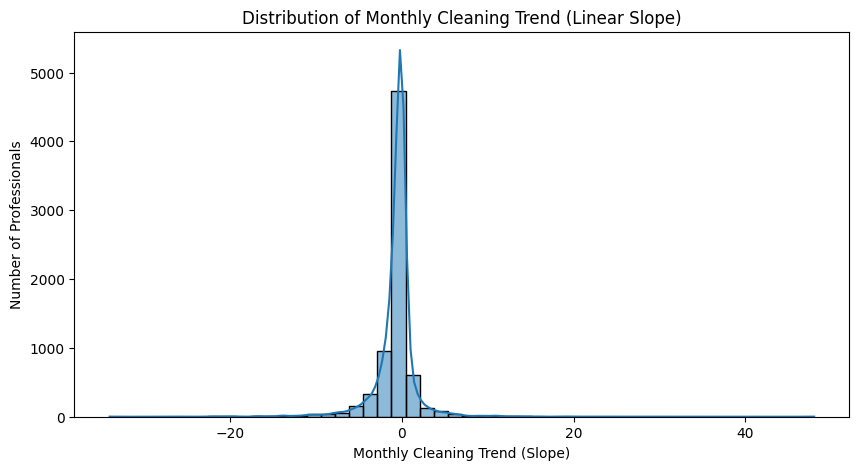

In [60]:
# Plot the distribution of monthly_cleaning_trend (linear slope) for all professionals

plt.figure(figsize=(10, 5))
sns.histplot(monthly_cleaning_trend["monthly_cleaning_trend"], bins=50, kde=True)
plt.title("Distribution of Monthly Cleaning Trend (Linear Slope)")
plt.xlabel("Monthly Cleaning Trend (Slope)")
plt.ylabel("Number of Professionals")
plt.show()

##### <b>27. booking_count_last_3_months</b>

In [61]:
# Calculate booking count for the last 3 months for each professional
#today = pd.Timestamp.today()
today = booking_raw["cleaning_date"].max()

# Filter bookings from the last 3 months
last_3_months = booking_raw[
    (booking_raw["booking_status"] == "เสร็จสิ้น") &
    (booking_raw["cleaning_date"] >= (today - pd.DateOffset(months=3)))
]

# Count total bookings in the last 3 months for each professional
booking_count_last_3_months = last_3_months.groupby("professional_id")["booking_id"].count().reset_index(name="booking_count_last_3_months")

booking_count_last_3_months.head()

,professional_id,booking_count_last_3_months
0,21,9
1,24,10
2,28,8
3,79,18
4,104,1


##### <b>28. last_30_vs_prev_30_cleaning_ratio</b>

In [62]:
# Calculate last_30_vs_prev_30_cleaning_ratio for each professional

#today = pd.Timestamp.today()
today = booking_raw["cleaning_date"].max()

# Define date ranges
last_30_start = today - pd.Timedelta(days=30)
prev_30_start = today - pd.Timedelta(days=60)
prev_30_end = today - pd.Timedelta(days=31)

# Successful bookings in last 30 days
last_30 = booking_raw[
    (booking_raw["booking_status"] == "เสร็จสิ้น") &
    (booking_raw["cleaning_date"] >= last_30_start)
]

# Successful bookings in previous 30 days (31-60 days ago)
prev_30 = booking_raw[
    (booking_raw["booking_status"] == "เสร็จสิ้น") &
    (booking_raw["cleaning_date"] >= prev_30_start) &
    (booking_raw["cleaning_date"] <= prev_30_end)
]

# Count bookings for each period
last_30_count = last_30.groupby("professional_id")["booking_id"].count().reset_index(name="cleaning_last_30d")
prev_30_count = prev_30.groupby("professional_id")["booking_id"].count().reset_index(name="cleaning_prev_30d")

# Merge and calculate ratio
last_30_vs_prev_30 = pd.merge(last_30_count, prev_30_count, on="professional_id", how="outer").fillna(0)
last_30_vs_prev_30["last_30_vs_prev_30_cleaning_ratio"] = (
    last_30_vs_prev_30["cleaning_last_30d"] / last_30_vs_prev_30["cleaning_prev_30d"].replace(0, np.nan)
)

last_30_vs_prev_30[["professional_id", "last_30_vs_prev_30_cleaning_ratio"]].head()

,professional_id,last_30_vs_prev_30_cleaning_ratio


##### <b>29. decline_booking_percent</b>

In [63]:
booking_raw["booking_status"].value_counts()

booking_status
เสร็จสิ้น                     1069849
ยกเลิก                          41606
รอเข้าให้บริการ                  9719
ยังไม่มีคุณแม่บ้านกดรับงาน        167
ยังไม่ระบุวันเข้าให้บริการ          0
Name: count, dtype: int64

In [64]:
# Calculate decline_booking_percent for each professional

# Count declined bookings (booking_status == "ยกเลิก")
declined = booking_raw[booking_raw["booking_status"] == "ยกเลิก"] \
    .groupby("professional_id")["booking_id"].count().reset_index(name="declined_count")

# Count all bookings per professional
total = booking_raw.groupby("professional_id")["booking_id"].count().reset_index(name="total_count")

# Merge and calculate percent
decline_booking_percent = pd.merge(total, declined, on="professional_id", how="left").fillna(0)
decline_booking_percent["decline_booking_percent"] = decline_booking_percent["declined_count"] / decline_booking_percent["total_count"]

decline_booking_percent[["professional_id", "decline_booking_percent"]].head()

,professional_id,decline_booking_percent
0,0,0.992698
1,4,1.000000
2,5,0.695332
3,6,0.444444
4,7,0.004662


#### ⚠ <b>Labels (if needed for supervised learning)</b>

##### <b>30. is_churned (1 if no cleaning in last 90 days)</b>

In [65]:
# Feature extraction: is_churned (1 if no cleaning in last 90 days)

# Reference date
#today = pd.Timestamp.today()
today = booking_raw["cleaning_date"].max()

# Find last cleaning date for each professional
last_cleaning_date = booking_raw[booking_raw["booking_status"] == "เสร็จสิ้น"] \
    .groupby("professional_id")["cleaning_date"].max().reset_index()

# Calculate days since last cleaning
last_cleaning_date["days_since_last_cleaning"] = (today - last_cleaning_date["cleaning_date"]).dt.days

# is_churned: 1 if days_since_last_cleaning > 90, else 0
last_cleaning_date["is_churned"] = (last_cleaning_date["days_since_last_cleaning"] > 90).astype(int)

is_churned = last_cleaning_date[["professional_id", "is_churned"]]
is_churned.head()

,professional_id,is_churned
0,0,1
1,5,1
2,6,1
3,7,1
4,8,1


In [66]:
is_churned.is_churned.value_counts()

is_churned
1    5542
0    1719
Name: count, dtype: int64

##### <b>31. is_high-value (total_booking in top 20%)</b>

In [67]:
# Feature extraction: is_high_value (1 if total_bookings in top 20%)

# Calculate total bookings per professional
total_bookings = booking_raw.groupby("professional_id")["booking_id"].count().reset_index(name="total_bookings")

# Find the threshold for the top 20%
threshold = total_bookings["total_bookings"].quantile(0.80)

# Assign is_high_value: 1 if total_bookings >= threshold, else 0
total_bookings["is_high_value"] = (total_bookings["total_bookings"] >= threshold).astype(int)

total_bookings[["professional_id", "total_bookings", "is_high_value"]].head()

,professional_id,total_bookings,is_high_value
0,0,32869,1
1,4,1,0
2,5,407,1
3,6,9,0
4,7,429,1


##### <b>32. is_frequent_cleaner (cleaning_frequency in top 10%)</b>

In [68]:
booking_raw.columns

Index(['booking_id', 'user_id', 'is_new_customer', 'user_place_id',
       'place_size', 'service_name', 'sub_service_name', 'extra_service',
       'province', 'district', 'booking_date', 'cleaning_date', 'is_sameday',
       'work_hour', 'additional_hour', 'total_price', 'discount_cost',
       'credit_discount_cost', 'promo_code', 'discount_pct', 'booking_status',
       'cancel_reason', 'professional_id', 'selected_professional_id',
       'is_new_professional', 'rating', 'problem', 'is_claimed_booking',
       'is_weekend', 'week', 'place_type'],
      dtype='object')

In [69]:
# Calculate cleaning_frequency for each professional (already done in cleaning_freq)
# cleaning_freq["cleaning_frequency"] = cleaning_freq["total_cleaning"] / cleaning_freq["lifetime_days"]

# Find the threshold for the top 10%
top10_threshold = cleaning_freq["cleaning_frequency"].quantile(0.90)

# Assign is_frequent_cleaner: 1 if cleaning_frequency >= threshold, else 0
cleaning_freq["is_frequent_cleaner"] = (cleaning_freq["cleaning_frequency"] >= top10_threshold).astype(int)

cleaning_freq[["professional_id", "cleaning_frequency", "is_frequent_cleaner"]].head()

,professional_id,cleaning_frequency,is_frequent_cleaner
0,0,0.021661,0
1,5,0.010300,0
2,6,0.001913,0
3,7,1.461538,1
4,8,0.500000,0


### ⚛️ <b>Extracted Features Fusion</b>

In [70]:
# Temporal Features (Behavior Over Time)
last_cleaning[["professional_id", "days_since_last_cleaning"]].head()
first_booking[["professional_id", "days_since_registration"]].head()
cleaning_freq.head()
first_cleaning[["professional_id", "first_cleaning_month"]].head()
total_bookings_feature.head()
weekend_ratio.head()

# Behavioral Features (Transaction-Based)
income_feature.head()
avg_work_hour_per_week.head()
max_weekly_income.head()
min_spend_weekly_income.head()
std_weekly_income.head()
cleaning_ratio[["professional_id", "cleaning_ratio_last_30d_vs_total"]].head()
booking_growth_rate.head()

# --- IGNORE --- Demographic Features (if available)
# demographic_features.head()

# Cateory Behavior
most_cleaning_place_type.head()
num_unique_cleaning_place_type.head()
recent_place_type_change[["professional_id", "recent_place_type_change"]].head()
repeat_ratio[["professional_id", "most_cleaning_place_type_repeat_ratio"]].head()
top3_onehot.head()

# --- IGNORE --- Platform Engagement (if available)
# platform_engagement_features.head()

# Advanced / Trend Features
monthly_cleaning_trend.head()
booking_count_last_3_months.head()
last_30_vs_prev_30[["professional_id", "last_30_vs_prev_30_cleaning_ratio"]].head()
decline_booking_percent[["professional_id", "decline_booking_percent"]].head()

,professional_id,decline_booking_percent
0,0,0.992698
1,4,1.000000
2,5,0.695332
3,6,0.444444
4,7,0.004662


In [71]:
behavior_over_time = last_cleaning[["professional_id", "days_since_last_cleaning"]] \
    .merge(first_booking[["professional_id", "days_since_registration"]], on="professional_id", how="left") \
    .merge(cleaning_freq, on="professional_id", how="left") \
    .merge(first_cleaning[["professional_id", "first_cleaning_month"]], on="professional_id", how="left") \
    .merge(total_bookings_feature, on="professional_id", how="left") \
    .merge(weekend_ratio, on="professional_id", how="left")

behavior_over_time.head()

,professional_id,days_since_last_cleaning,days_since_registration,total_cleaning,lifetime_days,cleaning_frequency,is_frequent_cleaner,first_cleaning_month,total_bookings,is_new_professional,weekend_ratio,is_weekend_professional
0,0,2,3399,72.0,3324.0,0.021661,0.0,4,72.0,0.0,0.388755,0
1,4,1041,1044,NaN,NaN,NaN,NaN,9,NaN,NaN,0.000000,0
2,5,105,3408,34.0,3301.0,0.010300,0.0,3,34.0,0.0,0.410319,0
3,6,767,3392,5.0,2614.0,0.001913,0.0,4,5.0,1.0,0.555556,1
4,7,3097,3406,418.0,286.0,1.461538,1.0,3,418.0,0.0,0.228438,0


In [72]:
behavior_transaction = income_feature \
    .merge(avg_work_hour_per_week, on="professional_id", how="left") \
    .merge(max_weekly_income, on="professional_id", how="left") \
    .merge(min_spend_weekly_income, on="professional_id", how="left") \
    .merge(std_weekly_income, on="professional_id", how="left") \
    .merge(cleaning_ratio[["professional_id", "cleaning_ratio_last_30d_vs_total"]], on="professional_id", how="left") \
    .merge(booking_growth_rate, on="professional_id", how="left")

behavior_transaction.head()

,professional_id,avg_income_per_booking,avg_work_hour_per_week,max_weekly_income,min_spend_weekly_income,std_weekly_income,cleaning_ratio_last_30d_vs_total,booking_growth_rate
0,0,727.916667,8.840000,17750.00,570.00,3447.511639,0.0,-1.766667e+00
1,5,735.104412,7.035714,7400.00,500.00,1731.672599,0.0,-7.692308e-02
2,6,276.888000,3.333333,663.33,221.11,223.612332,0.0,-3.000000e+00
3,7,367.222943,19.825581,7678.88,570.00,1581.978274,0.0,3.772727e+00
4,8,450.000000,2.250000,500.00,400.00,70.710678,0.0,-1.110223e-16


In [73]:
behavior_category = most_cleaning_place_type \
    .merge(num_unique_cleaning_place_type, on="professional_id", how="left") \
    .merge(recent_place_type_change[["professional_id", "recent_place_type_change"]], on="professional_id", how="left") \
    .merge(repeat_ratio[["professional_id", "most_cleaning_place_type_repeat_ratio"]], on="professional_id", how="left") \
    .merge(top3_onehot, on="professional_id", how="left")

behavior_category.head()

,professional_id,most_cleaning_place_type,num_unique_cleaning_place_type,recent_place_type_change,most_cleaning_place_type_repeat_ratio,คอนโด,บ้าน,สำนักงาน,อื่นๆ
0,0,คอนโด,4,1,0.491710,1,1,1,0
1,4,อื่นๆ,1,0,1.000000,0,0,0,1
2,5,บ้าน,4,1,0.508600,1,1,1,0
3,6,คอนโด,1,0,1.000000,1,0,0,0
4,7,สำนักงาน,3,0,0.449883,1,1,1,0


In [74]:
behavior_advanced = monthly_cleaning_trend \
    .merge(booking_count_last_3_months, on="professional_id", how="left") \
    .merge(last_30_vs_prev_30[["professional_id", "last_30_vs_prev_30_cleaning_ratio"]], on="professional_id", how="left") \
    .merge(decline_booking_percent[["professional_id", "decline_booking_percent"]], on="professional_id", how="left")

behavior_advanced.head()

,professional_id,monthly_cleaning_trend,booking_count_last_3_months,last_30_vs_prev_30_cleaning_ratio,decline_booking_percent
0,0,-1.766667e+00,NaN,NaN,0.992698
1,5,-7.692308e-02,NaN,NaN,0.695332
2,6,-3.000000e+00,NaN,NaN,0.444444
3,7,3.772727e+00,NaN,NaN,0.004662
4,8,-1.110223e-16,NaN,NaN,0.000000


### <b>In Conclusion</b>

จากชุดข้อมูลการจองการบริการ (Booking Data) สามารถหา Features ใน `Temporal Features (behavior_over_time)`, `Transaction-Based Behavioral (behavior_transaction)`, `Category Behavior (behavior_category)`, `Advanced / Trend Features (behavior_advanced)`

ยกเว้น Features ที่ไม่สามารถสกัดจากชุดข้อมูลได้ คือ `Demographic Features` (ยังไม่มีการบันทึกข้อมูลประเภทนี้), `Platform / Engagement` (อาจจะนำมาจากอีกชุดข้อมูลที่เป็นข้อมูลเกี่ยวกับลูกค้า)

In [78]:
# Count of unique professionals in the booking_raw DataFrame
print(f"Total professionals in service: {booking_raw.professional_id.unique().shape[0]}")

Total professionals in service: 7288


In [75]:
# Combine all the features DataFrames into a single DataFrame by professional_id

features_all = behavior_over_time \
.merge(behavior_transaction, on="professional_id", how="left") \
.merge(behavior_category, on="professional_id", how="left") \
.merge(behavior_advanced, on="professional_id", how="left")

features_all

,professional_id,days_since_last_cleaning,days_since_registration,total_cleaning,lifetime_days,cleaning_frequency,is_frequent_cleaner,first_cleaning_month,total_bookings,is_new_professional,...,recent_place_type_change,most_cleaning_place_type_repeat_ratio,คอนโด,บ้าน,สำนักงาน,อื่นๆ,monthly_cleaning_trend,booking_count_last_3_months,last_30_vs_prev_30_cleaning_ratio,decline_booking_percent
0,0,2,3399,72.0,3324.0,0.021661,0.0,4,72.0,0.0,...,1,0.491710,1,1,1,0,-1.766667,NaN,NaN,0.992698
1,4,1041,1044,NaN,NaN,NaN,NaN,9,NaN,NaN,...,0,1.000000,0,0,0,1,NaN,NaN,NaN,NaN
2,5,105,3408,34.0,3301.0,0.010300,0.0,3,34.0,0.0,...,1,0.508600,1,1,1,0,-0.076923,NaN,NaN,0.695332
3,6,767,3392,5.0,2614.0,0.001913,0.0,4,5.0,1.0,...,0,1.000000,1,0,0,0,-3.000000,NaN,NaN,0.444444
4,7,3097,3406,418.0,286.0,1.461538,1.0,3,418.0,0.0,...,0,0.449883,1,1,1,0,3.772727,NaN,NaN,0.004662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,12703,54,78,1.0,1.0,1.000000,1.0,5,1.0,1.0,...,0,1.000000,0,1,0,0,0.000000,1.0,NaN,0.000000
7284,12704,76,79,4.0,2.0,2.000000,1.0,5,4.0,1.0,...,0,1.000000,1,0,0,0,0.000000,4.0,NaN,0.000000
7285,12706,76,77,NaN,NaN,NaN,NaN,5,NaN,NaN,...,0,1.000000,0,0,1,0,NaN,NaN,NaN,NaN
7286,12710,75,76,NaN,NaN,NaN,NaN,5,NaN,NaN,...,0,1.000000,0,0,1,0,NaN,NaN,NaN,NaN
